In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -v -p matplotlib,pandas,mlxtend

Sebastian Raschka 
Last updated: 

CPython 3.4.3
IPython 3.1.0

matplotlib 1.4.3
pandas 0.16.0
mlxtend 0.2.0


# Enrichment Plots

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

def enrichment_plot(df, colors='bgrkcy', markers=' ', linestyles='-', alpha=0.5, lw=2,
                    legend=True, where='post', grid=True, count_label='Count',
                    xlim='auto', ylim='auto', invert_axes=False, ax=None):
    """
    Function to plot stacked barplots

    Parameters
    ----------
    df : pandas.DataFrame
      A pandas DataFrame where columns represent the different categories.

    colors: str (default: 'bgrcky')
      The colors of the bars.
      
    markers: str (default: ' ')
      Matplotlib markerstyles, e.g,
      'sov' for square,circle, and triangle markers.

    linestyles: str (default: '-')
      Matplotlib linestyles, e.g., 
      '-,--' to cycle normal and dashed lines. Note
      that the different linestyles need to be separated by commas.

    alpha: float (default: 0.5)
      Transparency level from 0.0 to 1.0.

    lw: int or float (default: 2)
      Linewidth parameter.

    legend: bool (default: True)
      Plots legend if True.

    where: {'post', 'pre', 'mid'} (default: 'post')
      Starting location of the steps.

    grid: bool (default: True)
      Plots a grid if True.

    ylabel: str (default: 'Count')
      y-axis label.

    xlim: 'auto' or array-like [min, max]
      Min and maximum position of the x-axis range.

    ylim: 'auto' or array-like [min, max]
      Min and maximum position of the y-axis range.

    ax: matplotlib axis, optional (default: None)
      Use this axis for plotting or make a new one otherwise

    Returns
    ----------
    ax: matplotlib axis

    """
    if isinstance(df, pd.Series):
        df_temp = pd.DataFrame(df)
    else:
        df_temp = df

    if ax is None:
        ax = plt.gca()
        
    color_gen = cycle(colors)
    marker_gen = cycle(markers)
    linestyle_gen = cycle(linestyles.split(','))
    r = range(1, len(df_temp.index)+1)
    labels = df_temp.columns
    
    x_data = df_temp 
    y_data = r

    for lab in labels:
        x, y = sorted(x_data[lab]), y_data 
        if invert_axes:
            x, y = y, x
        
        ax.step(x,
                y, 
                where=where, 
                label=lab, 
                color=next(color_gen), 
                alpha=alpha, 
                lw=lw, 
                marker=next(marker_gen),
                linestyle=next(linestyle_gen))

    if ylim == 'auto':
        ax.set_ylim([np.min(y_data)-1, np.max(y_data)+1])
    else:
        ax.set_ylim(ylim)

    if xlim == 'auto':
        df_min, df_max = np.min(x_data.min()), np.max(x_data.max())
        ax.set_xlim([df_min-1, df_max+1])
    else:
        ax.set_xlim(xlim)

    if legend:
        plt.legend(loc='best', numpoints=1)

    if grid:
        plt.grid()

    if count_label:
        if invert_axes:
            plt.xlabel(count_label) 
        else:
            plt.ylabel(count_label)
           


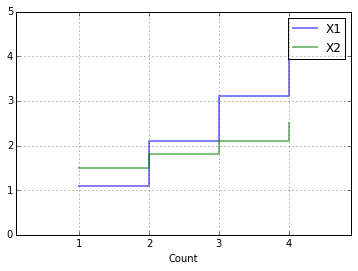

In [56]:
enrichment_plot(df, invert_axes=True)

In [57]:
import pandas as pd
s1 = [1.1, 1.5]
s2 = [2.1, 1.8]
s3 = [3.1, 2.1]
s4 = [3.9, 2.5]
data = [s1, s2, s3, s4]
df = pd.DataFrame(data, columns=['X1', 'X2'])
df

,X1,X2
0,1.1,1.5
1,2.1,1.8
2,3.1,2.1
3,3.9,2.5


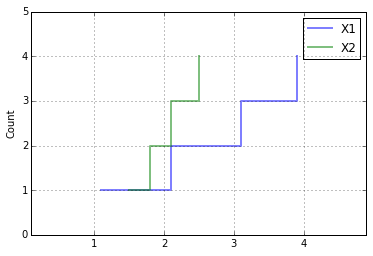

In [58]:
%matplotlib inline
#from mlxtend.matplotlib import enrichment_plot
enrichment_plot(df)

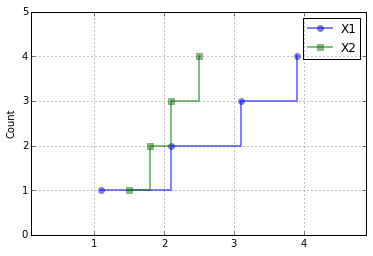

In [59]:
enrichment_plot(df, markers='os', ylim=[0,5])

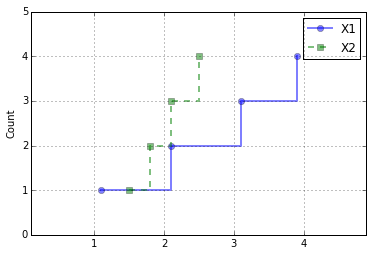

In [29]:
enrichment_plot(df, markers='os', linestyles='-,--')

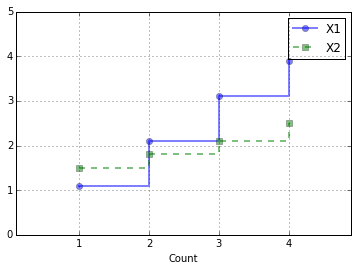

In [60]:
enrichment_plot(df, markers='os', linestyles='-,--', invert_axes=True)